In [10]:
print("hello")

hello


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("synthetic_doppler_shift_data.csv")

In [13]:
print(df.head())

  Galaxy Name  Observed Wavelength (nm)  Rest Wavelength (nm)  Redshift (z)  \
0         M32                657.454571                 656.3      0.001759   
1       IC 10                655.927959                 656.3     -0.000567   
2     NGC 147                656.249978                 656.3     -0.000076   
3     NGC 147                656.871134                 656.3      0.000870   
4       IC 10                656.767743                 656.3      0.000713   

   Radial Velocity (km/s)  Distance from Andromeda (kpc) Motion Direction  
0              527.398687                     383.408930         Receding  
1             -169.945154                     814.533419      Approaching  
2              -22.849773                     413.627805      Approaching  
3              260.889205                     367.204365         Receding  
4              213.661166                     544.200561         Receding  


In [14]:
import numpy as np

# Speed of light (km/s)
c = 299792.458

# Compute Redshift
df["Redshift (z)"] = (df["Observed Wavelength (nm)"] - df["Rest Wavelength (nm)"]) / df["Rest Wavelength (nm)"]

# Compute Radial Velocity
df["Radial Velocity (km/s)"] = df["Redshift (z)"] * c

# Determine motion direction
df["Motion Direction"] = df["Radial Velocity (km/s)"].apply(lambda v: "Approaching" if v < 0 else "Receding")

# Save the processed data
df.to_csv("processed_doppler_data.csv", index=False)

print(df.head())


  Galaxy Name  Observed Wavelength (nm)  Rest Wavelength (nm)  Redshift (z)  \
0         M32                657.454571                 656.3      0.001759   
1       IC 10                655.927959                 656.3     -0.000567   
2     NGC 147                656.249978                 656.3     -0.000076   
3     NGC 147                656.871134                 656.3      0.000870   
4       IC 10                656.767743                 656.3      0.000713   

   Radial Velocity (km/s)  Distance from Andromeda (kpc) Motion Direction  
0              527.398687                     383.408930         Receding  
1             -169.945154                     814.533419      Approaching  
2              -22.849773                     413.627805      Approaching  
3              260.889205                     367.204365         Receding  
4              213.661166                     544.200561         Receding  


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and labels
X = df[["Distance from Andromeda (kpc)", "Radial Velocity (km/s)"]]
y = df["Motion Direction"].map({"Approaching": 0, "Receding": 1})  # Convert to numerical labels

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Save the trained model
import joblib
joblib.dump(model, "andromeda_motion_model.pkl")


Model Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



['andromeda_motion_model.pkl']

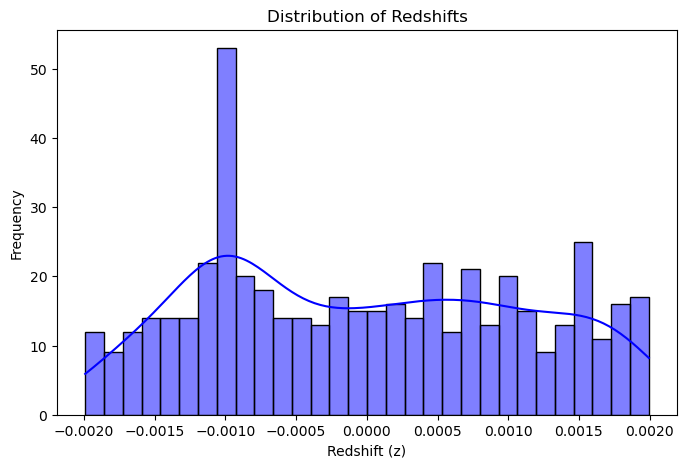

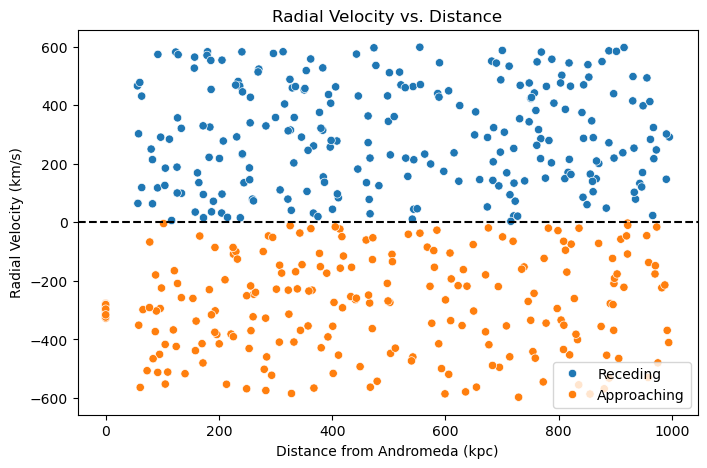

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Redshift Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Redshift (z)"], bins=30, kde=True, color='blue')
plt.xlabel("Redshift (z)")
plt.ylabel("Frequency")
plt.title("Distribution of Redshifts")
plt.show()

# Velocity vs. Distance Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Distance from Andromeda (kpc)"], y=df["Radial Velocity (km/s)"], hue=df["Motion Direction"])
plt.xlabel("Distance from Andromeda (kpc)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Radial Velocity vs. Distance")
plt.axhline(0, color='black', linestyle='--')  # Separates approaching/receding galaxies
plt.legend()
plt.show()


In [17]:
# Example: Predicting motion for a new galaxy
new_galaxy = pd.DataFrame({"Distance from Andromeda (kpc)": [500], "Radial Velocity (km/s)": [-250]})
predicted_motion = model.predict(new_galaxy)

print("Predicted Motion:", "Approaching" if predicted_motion[0] == 0 else "Receding")


Predicted Motion: Approaching


In [18]:
pip install astroquery

  Using cached astroquery-0.4.9.post1-py3-none-any.whl.metadata (6.3 kB)
  Using cached pyvo-1.6.1-py3-none-any.whl.metadata (4.8 kB)
Using cached astroquery-0.4.9.post1-py3-none-any.whl (11.1 MB)
Using cached pyvo-1.6.1-py3-none-any.whl (997 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
from astroquery.ned import Ned
from astroquery.sdss import SDSS
from astroquery.gaia import Gaia
import pandas as pd

# Example: Querying NED for Andromeda's satellite galaxies
satellites = ["M32", "M110", "NGC 147", "NGC 185", "NGC 205"]
data = []

for galaxy in satellites:
    result = Ned.query_object(galaxy)
    # Convert the astropy Table to a Pandas DataFrame
    data.append(result.to_pandas())

# Convert to DataFrame
df_ned = pd.concat(data, ignore_index=True)

# Display the data
print(df_ned)


E:\TEMP\ipykernel_17736\1677070983.py:1: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned


   No.  Object Name        RA       DEC Type  Velocity  Redshift  \
0    1  MESSIER 032  10.67438  40.86539    G    -213.0 -0.000710   
1    1  MESSIER 110  10.09195  41.68539    G    -241.0 -0.000804   
2    1     NGC 0147   8.30050  48.50875    G    -193.0 -0.000644   
3    1     NGC 0185   9.74118  48.33741    G    -202.0 -0.000674   
4    1  MESSIER 110  10.09195  41.68539    G    -241.0 -0.000804   

  Redshift Flag Magnitude and Filter  Separation  References  Notes  \
0           SUN                 9.03         NaN        1172     18   
1           SUN                 8.92         NaN         787     16   
2           SUN                10.47         NaN         470     11   
3           SUN                10.10         NaN         581     13   
4           SUN                 8.92         NaN         787     16   

   Photometry Points  Positions  Redshift Points  Diameter Points  \
0                127         44               28                8   
1                121      